In [1]:
import pandas as pd 
import numpy as np 

In [2]:
data=pd.read_csv('spam.csv')

In [3]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
475,ham,Ok I'm gonna head up to usf in like fifteen mi...,NaN,NaN,NaN
2377,spam,YES! The only place in town to meet exciting a...,NaN,NaN,NaN
4186,ham,Dear got bus directly to calicut,NaN,NaN,NaN
4759,ham,I'm home. Doc gave me pain meds says everythin...,NaN,NaN,NaN
4348,ham,ÌÏ bot notes oredi... Cos i juz rem i got...,NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
data.sample(5)

,v1,v2
154,ham,"You are everywhere dirt, on the floor, the win..."
975,ham,Hey no I ad a crap nite was borin without ya 2...
1209,ham,His bday real is in april .
4130,ham,\Its Ur luck to Love someone. Its Ur fortune t...
44,ham,Great! I hope you like your man well endowed. ...


In [9]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [10]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
data['target']=encoder.fit_transform(data['target'])

In [14]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
data.duplicated().sum()

403

In [16]:
data=data.drop_duplicates(keep='first')

In [17]:
data.shape

(5169, 2)

In [18]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

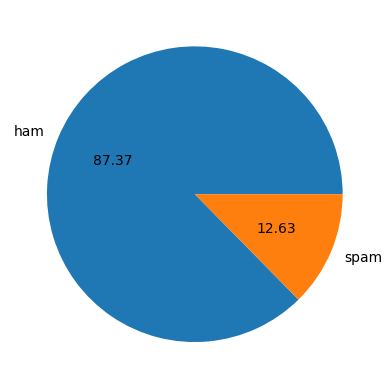

In [20]:
plt.pie(x=data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shyam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
data['number_characters']=data['text'].apply(len)

C:\Users\shyam\AppData\Local\Temp\ipykernel_6148\3021456992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['number_characters']=data['text'].apply(len)


In [23]:
data.head()

,target,text,number_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [25]:
data['number_words']=data['text'].apply(lambda x:len(word_tokenize(x)))

C:\Users\shyam\AppData\Local\Temp\ipykernel_6148\2155589234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['number_words']=data['text'].apply(lambda x:len(word_tokenize(x)))


In [26]:
data.head()

,target,text,number_characters,number_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
data['number_sentences']=data['text'].apply(lambda x: len(sent_tokenize(x)))

C:\Users\shyam\AppData\Local\Temp\ipykernel_6148\2207113520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['number_sentences']=data['text'].apply(lambda x: len(sent_tokenize(x)))


In [28]:
data.head()

,target,text,number_characters,number_words,number_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
data.describe()

,target,number_characters,number_words,number_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [30]:
data[data['target']==0][['number_characters','number_words','number_sentences']].describe()

,number_characters,number_words,number_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
data[data['target']==1][['number_characters','number_words','number_sentences']].describe()

,number_characters,number_words,number_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


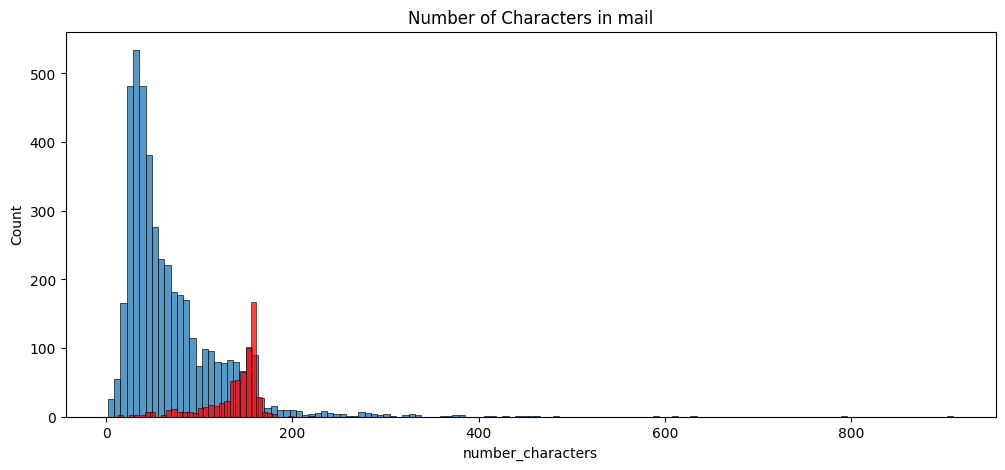

In [32]:
plt.figure(figsize=(12,5))
plt.title('Number of Characters in mail')
sns.histplot(data[data['target']==0]['number_characters'])
sns.histplot(data[data['target']==1]['number_characters'],color='red')
plt.show()

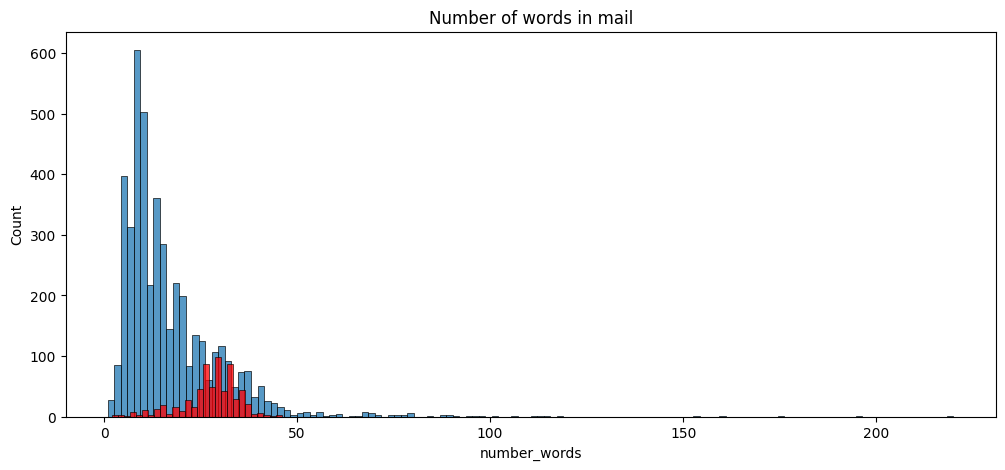

In [33]:
plt.figure(figsize=(12,5))
plt.title('Number of words in mail')
sns.histplot(data[data['target']==0]['number_words'])
sns.histplot(data[data['target']==1]['number_words'],color='red')
plt.show()

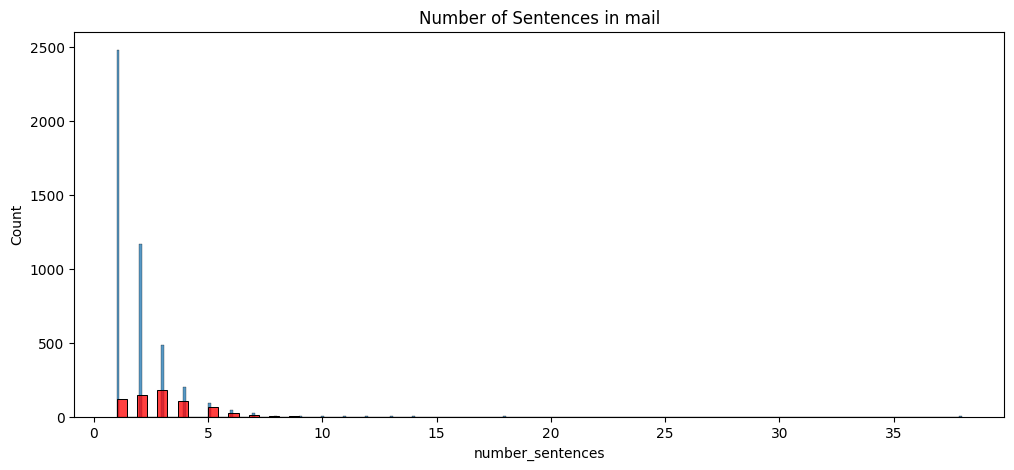

In [34]:
plt.figure(figsize=(12,5))
plt.title('Number of Sentences in mail')
sns.histplot(data[data['target']==0]['number_sentences'])
sns.histplot(data[data['target']==1]['number_sentences'],color='red')
plt.show()

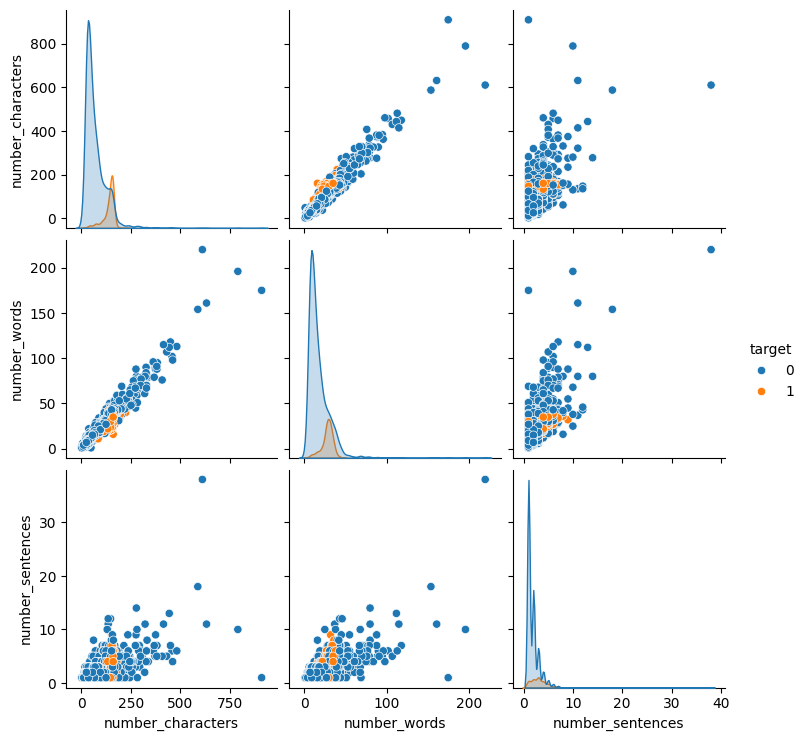

In [35]:
sns.pairplot(data=data,hue='target')
plt.show()

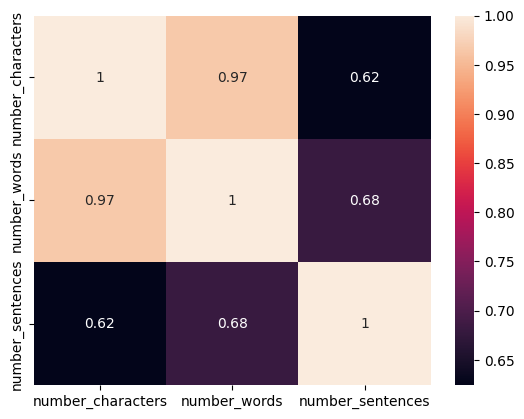

In [36]:
sns.heatmap(data[['number_characters','number_words','number_sentences']].corr(),annot=True)
plt.show()

In [37]:
from nltk.corpus import stopwords
from string import punctuation

In [38]:
stop=stopwords.words('english')
stop_word_list=list(punctuation)+stop

In [39]:
from nltk.stem import PorterStemmer

In [40]:
p=PorterStemmer()

In [86]:
def transform_text(text):
    text=text.lower()
    text=word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:] # cloning list to variable
    y.clear()
    for i in text:
        if i not in stop_word_list:
            
            y.append(p.stem(i))
    return ' '.join(y)

In [42]:
# transform_text(data['text'].apply(lambda x:x))

In [43]:
data['tranform_text']=data['text'].apply(transform_text)

C:\Users\shyam\AppData\Local\Temp\ipykernel_6148\490416784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tranform_text']=data['text'].apply(transform_text)


In [44]:
data.head(5)

,target,text,number_characters,number_words,number_sentences,tranform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc=WordCloud(width=800,height=800,min_font_size=10,background_color='white')

In [46]:
spam_wc=wc.generate(data[data['target']==1]['tranform_text'].str.cat(sep=" "))

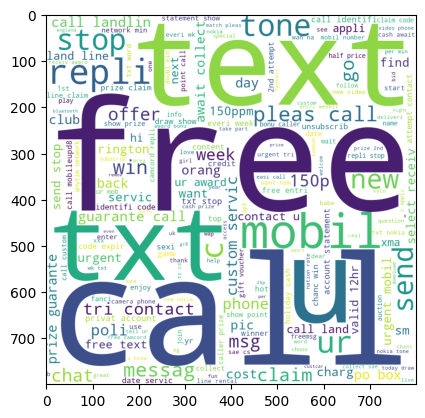

In [47]:
plt.imshow(spam_wc)
plt.show()

In [48]:
ham_wc=wc.generate(data[data['target']==0]['tranform_text'].str.cat(sep=' '))

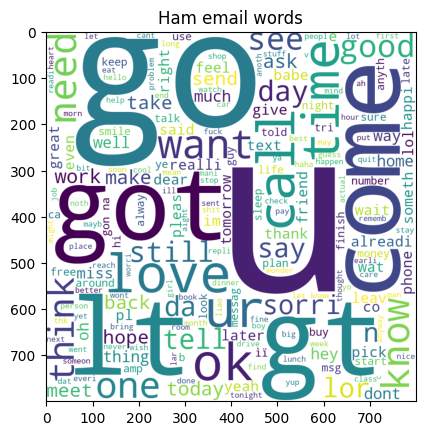

In [49]:
plt.imshow(ham_wc)
plt.title('Ham email words')
plt.show()

In [50]:
spam_word=[]
for sent in data[data['target']==1]['tranform_text'].tolist():
    for word in sent.split():
        spam_word.append(word)
        
        

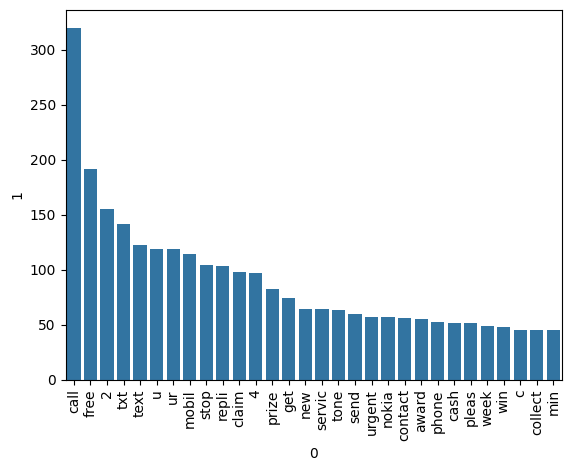

In [51]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_word).most_common(30))[0],y=pd.DataFrame(Counter(spam_word).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
ham_word=[]
for sent in data[data['target']==0]['tranform_text'].tolist():
    for word in sent.split():
        ham_word.append(word)

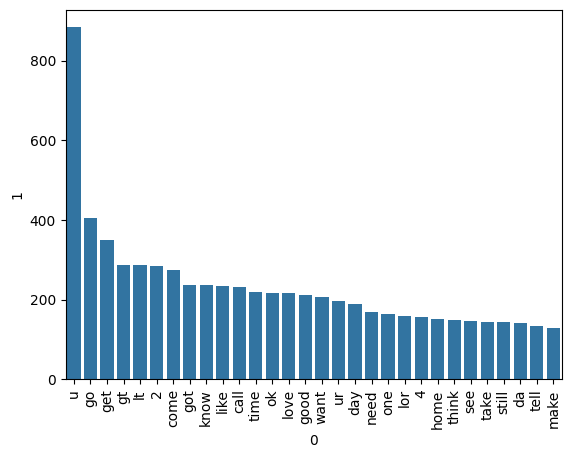

In [53]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_word).most_common(30))[0],y=pd.DataFrame(Counter(ham_word).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [1]:
import sklearn
print(sklearn.__version__)

1.5.2


In [1]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shyam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [87]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [88]:
X=tfidf.fit_transform(data['tranform_text']).toarray()

In [89]:
X.shape

(5169, 3000)

In [90]:
Y=data['target'].values

In [91]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [60]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.2,random_state=42)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [62]:
gnb.fit(x_train,y_train)
y_predict1=gnb.predict(x_test)
print(accuracy_score(y_test,y_predict1)*100)
print(precision_score(y_test,y_predict1)*100)
print(confusion_matrix(y_test,y_predict1))

88.75725338491296
54.54545454545454
[[3245  355]
 [ 110  426]]


In [63]:
mnb.fit(x_train,y_train)
y_predict2=mnb.predict(x_test)
print(accuracy_score(y_test,y_predict2)*100)
print(precision_score(y_test,y_predict2)*100)
print(confusion_matrix(y_test,y_predict2))

90.44970986460348
100.0
[[3600    0]
 [ 395  141]]


In [64]:
bnb.fit(x_train,y_train)
y_predict3=bnb.predict(x_test)
print(accuracy_score(y_test,y_predict3)*100)
print(precision_score(y_test,y_predict3)*100)
print(confusion_matrix(y_test,y_predict3))

92.60154738878144
97.91666666666666
[[3595    5]
 [ 301  235]]


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [92]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [93]:
models = {
    'LR': lrc,
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc,  
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [94]:
def train_classifier(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    precision = precision_score(y_test,y_pred)*100
    
    return accuracy,precision

In [95]:
train_classifier(svc,x_train,x_test,y_train,y_test)

(95.93810444874275, 96.0)

In [96]:
accuracy_scores = []
precision_scores = []
for name,model in models.items():
    current_accuracy,current_precision = train_classifier(model, x_train,x_test,y_train,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  91.12669245647969
Precision -  88.23529411764706
For  SVC
Accuracy -  95.93810444874275
Precision -  96.0
For  KN
Accuracy -  87.9110251450677
Precision -  100.0
For  NB
Accuracy -  90.44970986460348
Precision -  100.0
For  DT
Accuracy -  92.77079303675049
Precision -  78.69249394673123
For  RF
Accuracy -  94.1972920696325
Precision -  100.0


C:\Users\shyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  94.24564796905223
Precision -  85.30805687203792
For  BgC
Accuracy -  94.34235976789168
Precision -  86.6504854368932
For  ETC
Accuracy -  95.04352030947776
Precision -  99.10979228486647
For  GBDT
Accuracy -  93.90715667311412
Precision -  96.71052631578947
For  xgb
Accuracy -  94.41489361702128
Precision -  85.88235294117646


In [71]:
performance=pd.DataFrame({'Algorithm_name':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [72]:
performance

,Algorithm_name,Accuracy,Precision
2,KN,87.911025,100.000000
3,NB,90.449710,100.000000
5,RF,94.197292,100.000000
8,ETC,95.043520,99.109792
9,GBDT,93.907157,96.710526
1,SVC,95.938104,96.000000
0,LR,91.126692,88.235294
7,BgC,94.342360,86.650485
10,xgb,94.414894,85.882353
6,AdaBoost,94.245648,85.308057


In [73]:
performance_df = pd.melt(performance,id_vars = "Algorithm_name")
performance_df

,Algorithm_name,variable,value
0,KN,Accuracy,87.911025
1,NB,Accuracy,90.449710
2,RF,Accuracy,94.197292
3,ETC,Accuracy,95.043520
4,GBDT,Accuracy,93.907157
5,SVC,Accuracy,95.938104
6,LR,Accuracy,91.126692
7,BgC,Accuracy,94.342360
8,xgb,Accuracy,94.414894
9,AdaBoost,Accuracy,94.245648


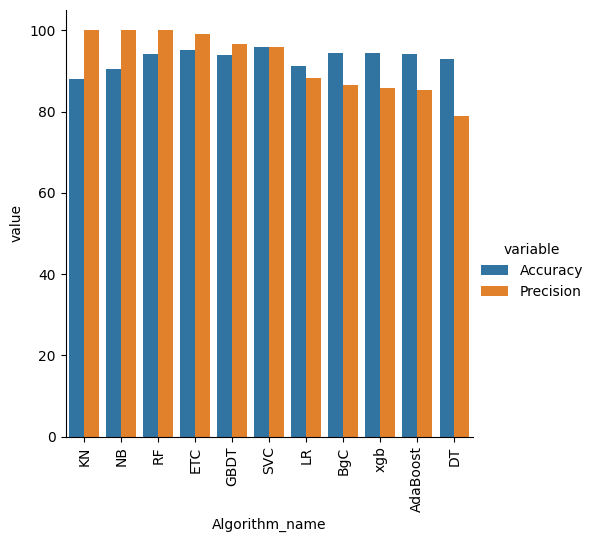

In [74]:
sns.catplot(x='Algorithm_name',y='value',hue='variable',data=performance_df,kind='bar',height=5)
plt.xticks(rotation='vertical')
plt.show()

In [75]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [76]:
vc=VotingClassifier(estimators=[('knc',knc),('naive',mnb),('rfc',rfc)],voting='soft')

In [77]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('knc', KNeighborsClassifier()),
                             ('naive', MultinomialNB()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [79]:
y_predict4=vc.predict(x_test)

In [82]:
print(accuracy_score(y_test,y_predict4)*100)
print(precision_score(y_test,y_predict4)*100)
print(confusion_matrix(y_test,y_predict4))

89.41005802707932
100.0
[[3600    0]
 [ 438   98]]


In [83]:
estimators=[('knc',knc),('naive',mnb),('rfc',rfc)]
final_estimator=RandomForestClassifier()

In [84]:
from sklearn.ensemble import StackingClassifier
sc=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [85]:
sc.fit(x_train,y_train)
y_predict5=sc.predict(x_test)
print(accuracy_score(y_test,y_predict5)*100)
print(precision_score(y_test,y_predict5)*100)
print(confusion_matrix(y_test,y_predict5))

96.97775628626692
89.59537572254335
[[3546   54]
 [  71  465]]


In [97]:
import pickle
pickle.dump(tfidf,open('vectorization.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))